### Import implementation classes

In [1]:
from SchedulingProblem import ProjectSchedulingModel
from ArtificialBeeColony import ArtificialBeeColony, Parameters

### Load problems instances

In [2]:
PATH = "j30.sm/j30"
problems = [ProjectSchedulingModel.from_file(f"{PATH}{i}_{j}.sm") for i in range(1, 49) for j in range(1, 11)]

In [13]:
with open("j30opt.sm", "r") as f:
    lines = f.readlines()

optimal = []
for line in lines[22:502]:
    line = line.split()
    optimal.append(int(line[2]))
print(len(optimal))
print(optimal)

480
[43, 47, 47, 62, 39, 48, 60, 53, 49, 45, 38, 51, 43, 43, 51, 47, 47, 54, 54, 43, 72, 40, 57, 98, 53, 54, 48, 54, 65, 59, 49, 60, 47, 57, 59, 45, 56, 55, 38, 48, 53, 82, 76, 63, 76, 64, 76, 67, 49, 70, 59, 51, 48, 42, 67, 37, 46, 39, 51, 61, 55, 42, 42, 44, 44, 35, 50, 44, 60, 49, 44, 51, 53, 48, 58, 47, 41, 51, 39, 67, 83, 92, 68, 71, 70, 59, 63, 91, 63, 88, 42, 56, 62, 58, 41, 44, 49, 54, 49, 41, 54, 56, 81, 63, 49, 44, 36, 62, 67, 38, 47, 46, 37, 63, 47, 53, 55, 35, 52, 57, 58, 62, 76, 72, 67, 64, 77, 106, 71, 64, 50, 53, 58, 50, 52, 35, 50, 54, 46, 61, 46, 47, 48, 48, 58, 67, 47, 50, 54, 65, 51, 48, 36, 47, 51, 51, 34, 44, 44, 51, 64, 68, 60, 49, 47, 63, 57, 61, 48, 66, 53, 55, 56, 70, 52, 62, 48, 52, 47, 49, 40, 58, 83, 39, 48, 49, 57, 55, 38, 47, 57, 70, 49, 43, 61, 51, 42, 51, 41, 37, 84, 59, 76, 70, 55, 76, 65, 62, 69, 69, 42, 45, 63, 42, 52, 52, 60, 55, 76, 55, 63, 53, 46, 65, 52, 48, 60, 48, 63, 61, 53, 58, 69, 53, 51, 56, 44, 38, 43, 53, 93, 75, 76, 81, 72, 58, 95, 69, 84

### Instantiate ABC optimizer

In [9]:
abc = ArtificialBeeColony(psmodel=problems[0])
params = Parameters(N=200, limit=150, max_trials=50)

### Solve

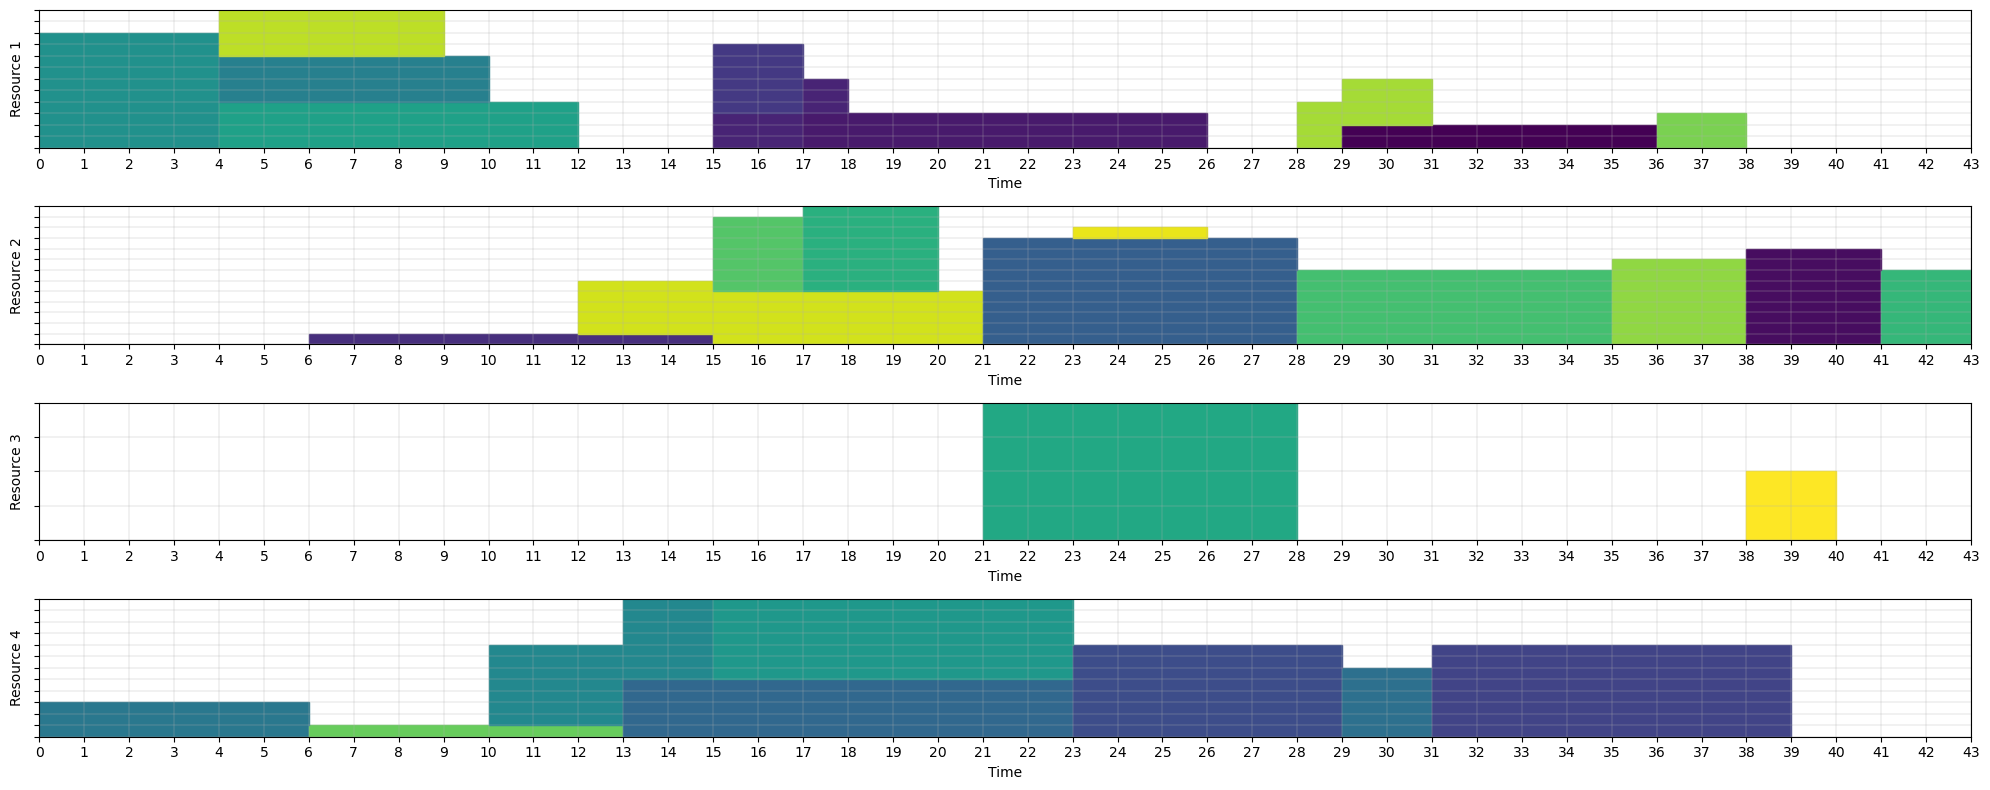

In [10]:
solution = abc.optimize(params)
solution.plot()

In [7]:
import timeit
abc = ArtificialBeeColony(psmodel=problems[0])
params = Parameters(N=500, limit=50, max_trials=20)

In [8]:
t1 = timeit.timeit(lambda: abc.optimize(params, num_workers=1), number=4)
print("Execution time for 1 worker:", t1)

Execution time for 1 worker: 30.898449125001207


In [9]:
t2 = timeit.timeit(lambda: abc.optimize(params, num_workers=4), number=4)
print("Execution time for 4 workers:", t2)

Execution time for 4 workers: 27.1726326670032
